In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import json
from datetime import datetime
import time

In [2]:
import models.graphene_thermodynamics_v2 as gt

In [ ]:
# Load interpolation data for the calculation of chemical potentials.
mm = gt.mu_func_use_2d_interpolation(load_from="mu_table.pkl")

In [3]:
saveDir = "./data/01/2023-05-11_test_thermodynamics"

In [23]:
# Density in one band given temperature and chemical potential.
tt = [10.0, 300.0, 1000.0, 3000.0]
mm = np.linspace(-3.0, 2.0, 10001)
dd = []
for tempK in tt:
    d = np.array([gt.oneband_dens_func(mu, tempK) for mu in mm])
    d[np.where(d == 0.0)[0]] = np.nan  # unphysical zeros to NaN
    dd.append(d)

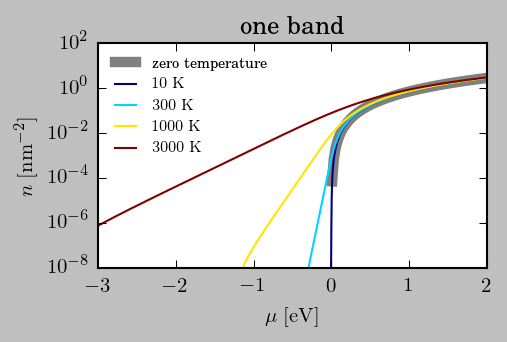

In [28]:
xx = np.linspace(0.01, 2.0, 101)
yy = xx*xx / gt.p["hbarvf"]**2 / np.pi
mpl.style.use(["classic", "latex"])
cmap = mpl.cm.get_cmap('jet')
plt.figure(figsize=(3.46,2.14), frameon=True, dpi=150)
plt.axes([0.2,0.2,0.75,0.7])
plt.plot(xx, np.log10(yy), "-", color="gray", lw=5.0, label="zero temperature")
for i,d in enumerate(dd):
    plt.plot(mm, np.log10(d), color=cmap(i/(len(dd)-1)), label=r"$%d~{\rm K}$" % int(tt[i]))
plt.ylim([-8.0, 2.0])
ty = [-8, -6, -4, -2, 0, 2]
plt.yticks(ty, [r"$10^{%d}$" % t for t in ty])
plt.xlabel(r"$\mu~[{\rm eV}]$")
plt.ylabel(r"$n~[{\rm nm}^{-2}]$")
plt.title(r"one band")
plt.legend(frameon=False, loc="upper left", fontsize=7)
plt.savefig("%s/density_one_band.png" % saveDir, dpi=300)

In [32]:
gt.oneband_mu_func_bisect(0.002, 1000.0, quiet=False)

-0.14194425451751158

In [10]:
# Density in two bands given temperature and chemical potential.
tt = [10.0, 300.0, 1000.0, 3000.0]
mm = np.linspace(-3.0, 1.0, 10001)
dd = []
for tempK in tt:
    d = np.array([gt.twobands_dens_func(mu, tempK) for mu in mm])
    d[np.where(d == 0.0)[0]] = np.nan  # unphysical zeros to NaN
    dd.append(d)

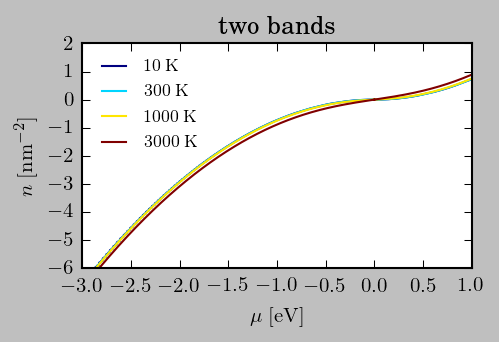

In [11]:
mpl.style.use(["classic", "latex"])
cmap = mpl.cm.get_cmap('jet')
plt.figure(figsize=(3.46,2.14), frameon=True, dpi=150)
plt.axes([0.2,0.2,0.75,0.7])
for i,d in enumerate(dd):
    plt.plot(mm, d, color=cmap(i/(len(dd)-1)), label=r"$%d~{\rm K}$" % int(tt[i]))
plt.ylim([-6.0, 2.0])
plt.xlabel(r"$\mu~[{\rm eV}]$")
plt.ylabel(r"$n~[{\rm nm}^{-2}]$")
plt.title(r"two bands")
plt.legend(frameon=False, loc="upper left", fontsize=8)
plt.savefig("%s/density_two_bands.png" % saveDir, dpi=300)

In [ ]:
# Explore the lower limits on the density
tt = np.logspace(np.log10(10.0), np.log10(3000.0), 101)
mm = np.linspace(-5.0, 2.0, 10001)
densmin = []
for tempK in tt:
    dd = np.array([gt.oneband_dens_func(mu, tempK) for mu in mm])
    densmin.append(np.min(dd[np.nonzero(dd)]))
densmin = np.array(densmin)

In [ ]:
mpl.style.use(["classic", "latex"])
plt.figure(figsize=(3.46,2.14), frameon=True, dpi=150)
plt.axes([0.2,0.2,0.75,0.7])
plt.plot(np.log10(tt), np.log10(densmin), "-k")
plt.xlabel(r"$T~[{\rm K}]$")
plt.ylabel(r"$n_{\rm min}~[{\rm nm}^{-2}]$")
#ty = [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0]
#plt.xticks([np.log10(t) for t in tx], [r"$%.0f$" % t for t in tx])
#plt.xlim([np.log10(10.0), np.log10(3000.0)])

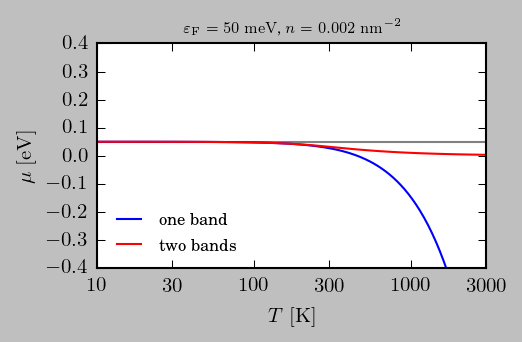

In [38]:
# Chemical potential in one band and two bands.
eF = 0.050
dens = gt.oneband_dens_ef_func(eF)
tt = np.logspace(np.log10(10.0), np.log10(3000.0), 101)
mu1 = np.array([gt.oneband_mu_func_bisect(dens, tempK) for tempK in tt])
mu2 = np.array([gt.twobands_mu_func_bisect(dens, tempK) for tempK in tt])

mpl.style.use(["classic", "latex"])
plt.figure(figsize=(3.46,2.14), frameon=True, dpi=150)
plt.axes([0.2,0.2,0.75,0.7])
plt.axhline(eF, color="gray")
plt.plot(np.log10(tt), mu1, "-b", label="one band")
plt.plot(np.log10(tt), mu2, "-r", label="two bands")
plt.xlabel(r"$T~[{\rm K}]$")
plt.ylabel(r"$\mu~[{\rm eV}]$")
plt.title(r"\scriptsize $\varepsilon_{\rm F} = %d~{\rm meV}$, $n = %.3f~{\rm nm}^{-2}$" % (int(eF * 1.0e+3), dens))
tx = [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0]
plt.xticks([np.log10(t) for t in tx], [r"$%.0f$" % t for t in tx])
plt.xlim([np.log10(10.0), np.log10(3000.0)])
plt.ylim([-0.4, 0.4])
plt.legend(frameon=False, loc="lower left", fontsize=8)
plt.savefig("%s/chemical_potential_%03dmeV.png" % (saveDir, int(eF * 1.0e+3)), dpi=300)

In [ ]:
# Energy vs. temperature.
eF = 0.010
dens = gt.oneband_dens_ef_func(eF)
tt = np.logspace(np.log10(10.0), np.log10(3000.0), 1001)
mm = np.array([gt.oneband_mu_func(dens, tempK) for tempK in tt])
ee = np.array([gt.oneband_energy_func(mu, tempK) for mu, tempK in zip(mm,tt)])

In [ ]:
mpl.style.use(["classic", "latex"])
plt.figure(figsize=(3.46,2.14), frameon=True, dpi=150)
plt.axes([0.2,0.2,0.75,0.7])
plt.plot(np.log10(tt), np.log10(ee), "-k")
plt.xlabel(r"$T~[{\rm K}]$")
plt.ylabel(r"$E~[{\rm eV}/{\rm nm}^{2}]$")
plt.title(r"\scriptsize $\varepsilon_{\rm F} = %d~{\rm meV}$" % int(eF * 1.0e+3))
tx = [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0]
plt.xticks([np.log10(t) for t in tx], [r"$%.0f$" % t for t in tx])
plt.xlim([np.log10(10.0), np.log10(3000.0)])

In [ ]:
# Heat capacity vs. temperature.
eF = 0.010
dens = gt.oneband_dens_ef_func(eF)
tt = np.logspace(np.log10(10.0), np.log10(3000.0), 1001)
cc = np.array([gt.oneband_heat_capacity_func(dens, tempK=tempK, dtK=10.0) for tempK in tt])
cd = np.array([gt.heat_capacity_doped(dens, tempK) for tempK in tt])

In [ ]:
mpl.style.use(["classic", "latex"])
plt.figure(figsize=(3.46,2.14), frameon=True, dpi=150)
plt.axes([0.2,0.2,0.75,0.7])
plt.plot(np.log10(tt), np.log10(cc), "-k")
plt.plot(np.log10(tt), np.log10(cd), "--r")
plt.xlabel(r"$T~[{\rm K}]$")
plt.ylabel(r"$c_{\rm v}~[{\rm eV}/({\rm nm}^{2}{\rm K})]$")
plt.title(r"\scriptsize $\varepsilon_{\rm F} = %d~{\rm meV}$" % int(eF * 1.0e+3))
tx = [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0]
plt.xticks([np.log10(t) for t in tx], [r"$%.0f$" % t for t in tx])
plt.xlim([np.log10(10.0), np.log10(3000.0)])
# plt.ylim([-8.0, -4.0])
#plt.savefig("%s/heat_capacity_%03dmeV.png" % (saveDir, int(eF * 1.0e+3)), dpi=300)

In [ ]:
# Heat capacity vs. temperature.
eF = 0.010
dens = gt.twobands_dens_ef_func(eF)
tt = np.logspace(np.log10(10.0), np.log10(3000.0), 1001)
cc = np.array([gt.twobands_heat_capacity_func(dens, tempK=tempK, dtK=10.0) for tempK in tt])
cu = np.array([gt.heat_capacity_undoped(tempK) for tempK in tt])
cd = np.array([gt.heat_capacity_doped(dens, tempK) for tempK in tt])

In [ ]:
mpl.style.use(["classic", "latex"])
plt.figure(figsize=(3.46,2.14), frameon=True, dpi=150)
plt.axes([0.2,0.2,0.75,0.7])
plt.plot(np.log10(tt), np.log10(cc), "-k")
plt.plot(np.log10(tt), np.log10(cu), "--b")
plt.plot(np.log10(tt), np.log10(cd), "--r")
plt.xlabel(r"$T~[{\rm K}]$")
plt.ylabel(r"$c_{\rm v}~[{\rm eV}/({\rm nm}^{2}{\rm K})]$")
plt.title(r"\scriptsize $\varepsilon_{\rm F} = %d~{\rm meV}$" % int(eF * 1.0e+3))
tx = [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0]
plt.xticks([np.log10(t) for t in tx], [r"$%.0f$" % t for t in tx])
ty = [-10, -8, -6, -4]
plt.yticks(ty, [r"$10^{%d}$" % t for t in ty])
plt.xlim([np.log10(10.0), np.log10(3000.0)])
plt.ylim([-10.0, -4.0])
plt.savefig("%s/heat_capacity_%03dmeV.png" % (saveDir, int(eF * 1.0e+3)), dpi=300)

In [ ]:
# Heat capacity vs. density.
tempK = 300.0
nn = np.logspace(-5.0, -2.0, 101)
cc = np.array([gt.oneband_heat_capacity_func(dens, tempK=tempK, dtK=10.0) for dens in nn])
plt.figure()
plt.plot(nn, cc, "-k")

In [ ]:
np.minimum(3.0, 4.0)

In [ ]:
def f(x,y,z):
    return x+y+z

u = (4,5)
f(*u,3)